<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

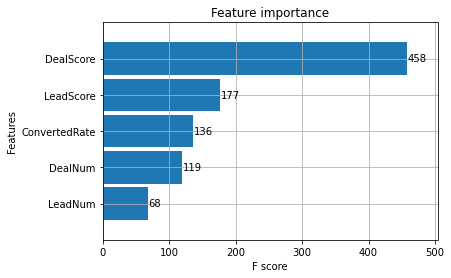

In [2]:
"""
시나리오 2 : Multioutput Regression with XGBoost 활용하여 해당 달의 추후 12개월간의 매출 예측
"""
! pip install xgboost
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from xgboost import XGBRegressor

# Load the Dataset
revenue = pd.read_csv('../../resource/Model_Input/Monthly_zoho.csv')
features_considered = ['DealScore', 'LeadScore', 'ConvertedRate', 'DealNum', 'LeadNum', 'Net']
revenue = revenue[features_considered]

# Min-Max Scaling
# scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
# scaler = scaler.fit(revenue) #값을 0~1로 떨어뜨린다
# scaled = scaler.transform(revenue) #값을 0~1로 떨어뜨린다
# # print(scaled)
# x = []
# y = []
# for row in revenue.index :
#     if (row+13 <= len(revenue)):
#         x.append(revenue.iloc[row])
#         y.append(list(revenue.iloc[row+1:row+13, -1]))
#     else: break
#
# x = pd.DataFrame(x)
# print(y)


# 학습과 테스트 데이터 분리
split = 45
df_train = revenue[:split]
df_test = revenue[split:]

df_train_y = df_train.loc[:,'Net']
df_train_x = df_train.drop('Net', axis=1)
df_test_y = df_test.loc[:,'Net']
df_test_x = df_test.drop('Net', axis=1)

XG_model_month = xgb.XGBRegressor(n_estimators=1000)
XG_model_month.fit(df_train_x, df_train_y, eval_set=[(df_test_x, df_test_y)], early_stopping_rounds=50,verbose=False)

# 주요하게 적용하는 변수를 판단
plot_importance(XG_model_month, height=0.9)
